## 6388040 Ariya Phengphon (Section 2)
### Lab 13 : Introduction to data science using case studies in Kaggle (cont.)

In [1]:
# Import the neccessary modules for data manipulation and visual representation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as matplot
import seaborn as sns
%matplotlib inline

In [2]:
# Use panda to read csv file
df = pd.read_csv('HR_comma_sep.csv', index_col=None)

In [3]:
# Rename the certain columns
df = df.rename(columns={'satisfaction_level': 'satisfaction',
'last_evaluation': 'evaluation',
'number_project': 'projectCount',
'average_montly_hours': 'averageMonthlyHours',
'time_spend_company': 'yearsAtCompany',
'Work_accident': 'workAccident',
'promotion_last_5years': 'promotion',
'sales' : 'department',
'left' : 'turnover'
})
df.head()
# rename each column by old:new and print for first 5 rows,
# head() if not have any number in the parenthesis (), it will set the default to be the first 5 rows

,satisfaction,evaluation,projectCount,averageMonthlyHours,yearsAtCompany,workAccident,turnover,promotion,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Turnover V.S. AverageMontlyHours

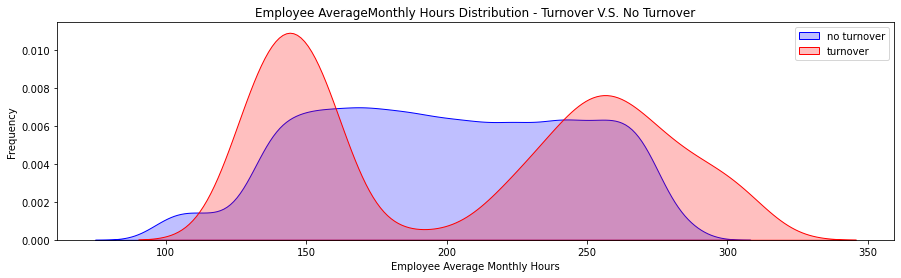

In [4]:
fig = plt.figure(figsize=(15,4))
ax = sns.kdeplot(df.loc[(df['turnover'] == 0),'averageMonthlyHours'] ,  # people who leave the company and the average montly hours
    color='b',shade=True, label='no turnover')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1),'averageMonthlyHours'] ,  # people who still working in the company and the average montly hours
    color='r',shade=True, label='turnover')
ax.set(xlabel='Employee Average Monthly Hours', ylabel='Frequency')
plt.title('Employee AverageMonthly Hours Distribution - Turnover V.S. No Turnover')
plt.legend()

# print(df.loc[(df['turnover'] == 0),'averageMonthlyHours'])

# From the graph, there are two groups of employees who leave the company:
# had less hours of work and had too many hours of work. Can you give a
# suggestion on which group tend to leave the company? How should we deal with them.

# ANS from the graph, I think if people who has less hour work, tend to leave the company, (feel bored?) => :(
# and around the middle, it seems fine because no turnover rate > turnover rate => :)
# the last one is group of people who has many works, also tend to leave the company, (feel tired) => :(
    # my suggestion is to have an avg montly hours around 200 hr/month.

## Turnover V.S. Satisfaction

0        0.38
1        0.80
2        0.11
3        0.72
4        0.37
         ... 
14994    0.40
14995    0.37
14996    0.37
14997    0.11
14998    0.37
Name: satisfaction, Length: 3571, dtype: float64


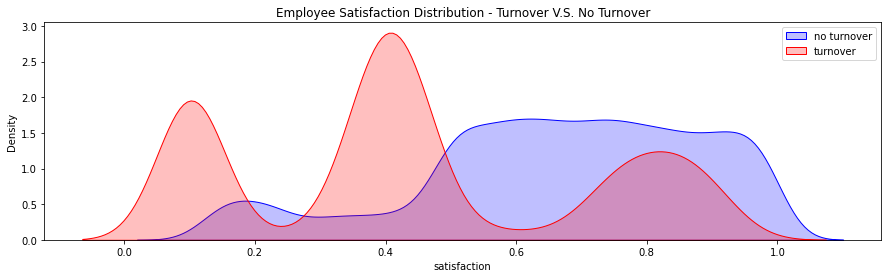

In [5]:
fig = plt.figure(figsize=(15,4))
print(df.loc[(df['turnover'] == 1), 'satisfaction'])
ax = sns.kdeplot(df.loc[(df['turnover'] == 0),'satisfaction'] ,
    color='b',shade=True, label='no turnover')
ax = sns.kdeplot(df.loc[(df['turnover'] == 1),'satisfaction'] ,
    color='r',shade=True, label='turnover')
plt.title('Employee Satisfaction Distribution - Turnover V.S. No Turnover')
plt.legend()

# print(df.loc[(df['turnover'] == 1),'satisfaction'])

# Which groups of employees tend to leave the company (low satisfaction level,
# medium satisfaction level, or high satisfaction level)?
# Can you guess that why employees with the high satisfaction level still left the company?

# ANS group medium satisfaction
# we might need to look at different aspects.

## Satisfaction V.S. Evaluation

Text(0.5, 1.0, 'Employee Satisfaction & Evaluation Distribution - Turnover V.S. No Turnover')

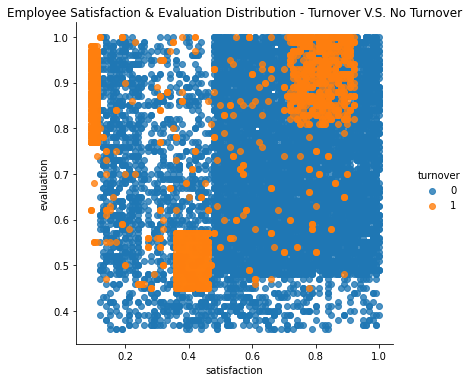

In [6]:
sns.lmplot(x='satisfaction', y='evaluation', data=df,
        fit_reg=False, hue='turnover')
plt.title('Employee Satisfaction & Evaluation Distribution - Turnover V.S. No Turnover')

# How many clusters for employees who left the company?
# Which clusters show the hard-working and sad employee?

# ANS from the graph, there are 3 clusters of employess who left the company (red cluster)
# maybe the left most cluster, sad employee => low satisfaction
#                              hard-working => high evaluation(?) like people who work hard usual receive high evaluation lol

### ------ **Milestone 1 completed** ------

## Using K-Means Clustering to analyze

### Satisfaction v.s. Evaluation (Turnover)

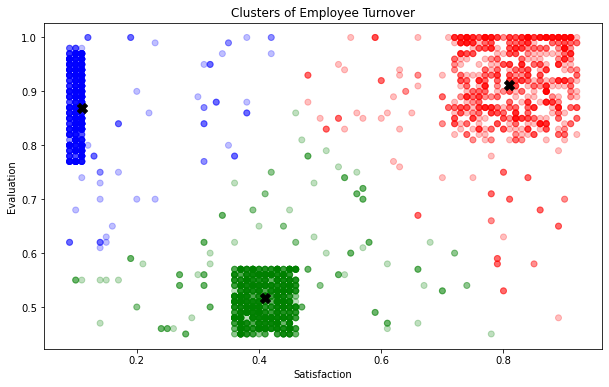

In [7]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(df[df.turnover==1][["satisfaction","evaluation"]])
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_] # set the colors to each cluster

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="satisfaction", y="evaluation",
        data=df[df.turnover==1], alpha=0.25,color = kmeans_colors)
plt.xlabel("Satisfaction")
plt.ylabel("Evaluation")

# center plot
plt.scatter(x=kmeans.cluster_centers_[:,0],   # satisfaction column
            y=kmeans.cluster_centers_[:,1],   # evaluation column
            color="black", marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

# However, this is only one aspect. Can you try to apply K-Means on others
# e.g. project count V.S. average monthly hours, work accident V.S. satisfaction,
# and project count V.S. promotion to gain more insight?

### project count V.S. average monthly hours (Turnover)

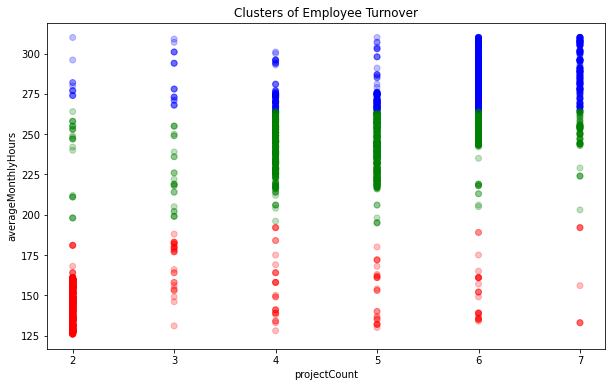

In [8]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(df[df.turnover==1][["projectCount","averageMonthlyHours"]])
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_] # set the colors to each cluster

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="projectCount", y="averageMonthlyHours",
        data=df[df.turnover==1], alpha=0.25,color = kmeans_colors)
plt.xlabel("projectCount")
plt.ylabel("averageMonthlyHours")

# center plot
# plt.scatter(x=kmeans.cluster_centers_[:,2],   # projectCount column
#             y=kmeans.cluster_centers_[:,3],   # averageMonthlyHours column
#             color="black", marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()


### project count V.S. satisfaction (Turnover)

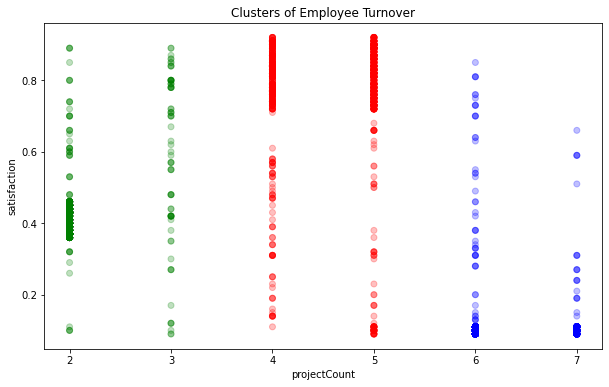

In [9]:
kmeans = KMeans(n_clusters=3, random_state=2)
kmeans.fit(df[df.turnover==1][["projectCount","satisfaction"]])
kmeans_colors = ['green' if c == 0 else 'blue' if c == 2 else 'red' for c in kmeans.labels_] # set the colors to each cluster

fig = plt.figure(figsize=(10, 6))
plt.scatter(x="projectCount", y="satisfaction",
        data=df[df.turnover==1], alpha=0.25,color = kmeans_colors)
plt.xlabel("projectCount")
plt.ylabel("satisfaction")

# center plot
# plt.scatter(x=kmeans.cluster_centers_[:,5],   # projectCount column
#             y=kmeans.cluster_centers_[:,0],   # satisfaction column
#             color="black", marker="X",s=100)
plt.title("Clusters of Employee Turnover")
plt.show()

### ------ **Milestone 2 completed** ------

## Apply machine learning techniques to build a prediction model

The following code is used to build the decision tree based on our HR data
to predict the turn over.

In [13]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

plt.style.use('fivethirtyeight') # change your style sheet
plt.rcParams['figure.figsize'] = (12,6) # set figure size

# you can skip this part, if you already changed the column name.
df = df.rename(columns={'satisfaction_level': 'satisfaction',
            'last_evaluation': 'evaluation', 'number_project': 'projectCount',
            'average_montly_hours': 'averageMonthlyHours','time_spend_company': 'yearsAtCompany',
            'Work_accident': 'workAccident', 'promotion_last_5years': 'promotion',
            'sales': 'department', 'left' : 'turnover'
})

# Convert these variables into categorical variables
df["department"] = df["department"].astype('category').cat.codes # change datatype to category
# print(df['department'])
df["salary"] = df["salary"].astype('category').cat.codes
# print(df['salary'])

# Create train and test splits
target_name = 'turnover'
# Delete all turnover column
X = df.drop('turnover', axis=1) 
# print(X)
# Turnover column
y=df[target_name]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=123, stratify=y)
dtree = tree.DecisionTreeClassifier(max_depth=3, class_weight="balanced",
                                    min_weight_fraction_leaf=0.01)
dtree = dtree.fit(X_train,y_train) # dtree is your trained model.

In [11]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import graphviz
import pydotplus

# In-memory file-like object => used as input or output to the most function that would expect a standard file object
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
dotfile = open("dtree2.dot", 'w') # write dtree2.dot file
tree.export_graphviz(dtree, out_file = dotfile, feature_names = X.columns)
dotfile.close()

In [12]:
dtree = tree.DecisionTreeClassifier(max_depth=3, class_weight="balanced", min_weight_fraction_leaf=0.01)

- Gini index: calculates the amount of probability of a specific feature that is classified incorrectly when selected randomly.
where 0 expresses the purity of classification, i.e. All the elements belong to a specified class or only one class exists there. And 1 indicates the random distribution of elements across various classes. The value of 0.5 of the Gini Index shows an equal distribution of elements over some classes.
 
- The value line in each box is telling you how many samples at that node fall into each category


### ------ **Milestone 3 completed** ------